In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Conv2D, Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
print(X_train.shape)

(60000, 28, 28)


In [5]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
X_train = (X_train - 0.0)/(255.0 - 0.0)
X_test = (X_test - 0.0)/(255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

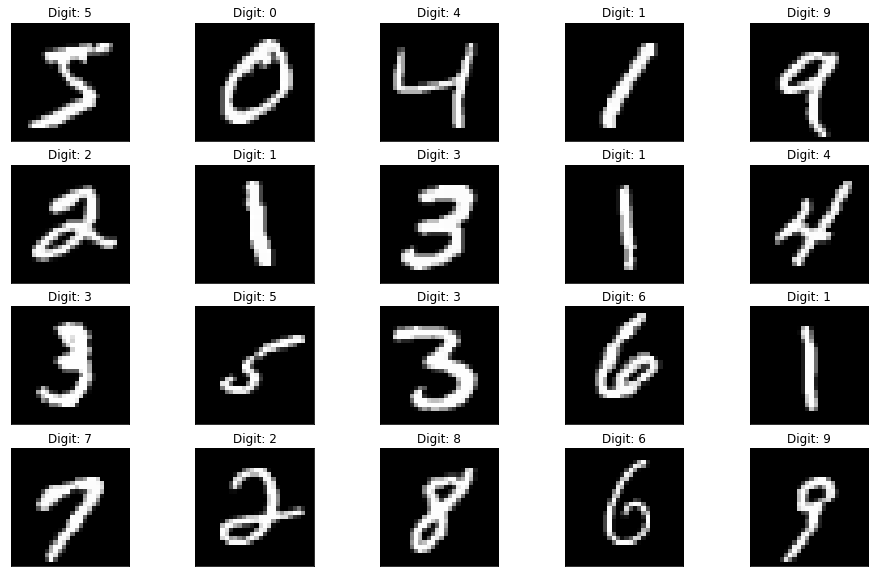

In [7]:
def plot_digit(image,digit,plt,i):
    plt.subplot(4,5,i+1)
    plt.imshow(image , cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(X_train[i],y_train[i],plt,i)
plt.show()

In [8]:
X_train = X_train.reshape((X_train.shape +(1,)))
X_test = X_test.reshape((X_test.shape +(1,)))

In [9]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10,activation="softmax")
])

In [11]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",  # Corrected loss function name
    metrics=["accuracy"]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2313 - accuracy: 0.9297
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0771 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0488 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0341 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0252 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0188 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0144 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0073 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 21s 11m

1/1 [==============================] - 0s 23ms/step


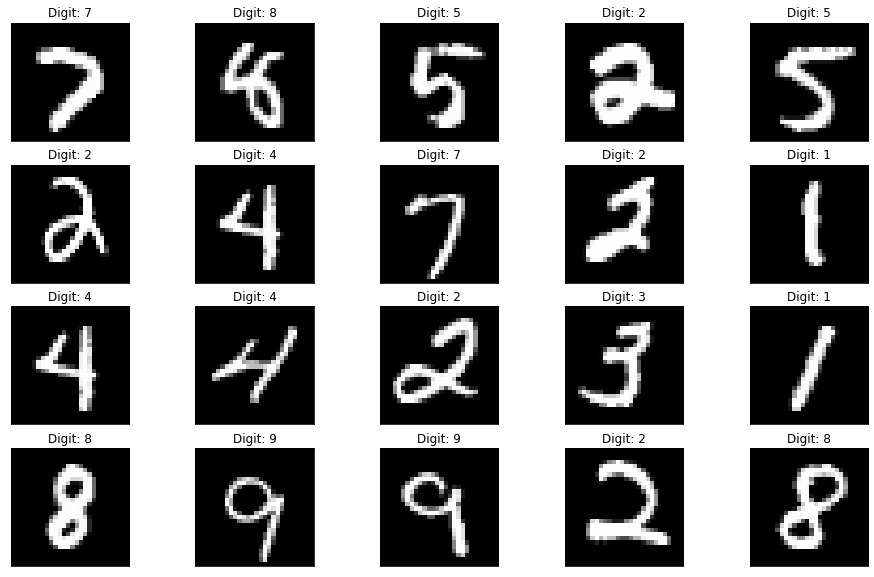

In [14]:
plt.figure(figsize=(16,10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [15]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 [==============================] - 1s 4ms/step


0.9868

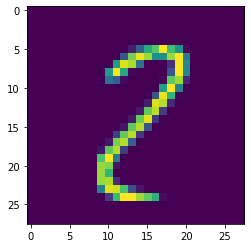

In [17]:
n= random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [18]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is= 2


In [21]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test Accuracy: ',score[1] )

Test loss:  0.04725630208849907
Test Accuracy:  0.9868000149726868
